In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

df = pd.read_csv("03_AirPassengers.csv")

In [16]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.head()

C:\Users\shrey\AppData\Local\Temp\ipykernel_22236\2374905374.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)


,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [17]:
df.set_index('date', inplace=True)
df.shape

(144, 1)

In [18]:
df = df.dropna()
df.shape

(144, 1)

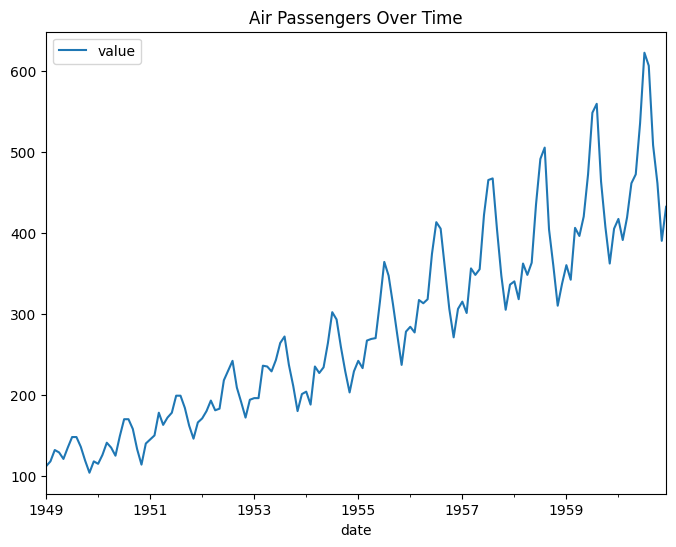

In [19]:
df.plot(figsize=(8,6), title='Air Passengers Over Time')
plt.show()

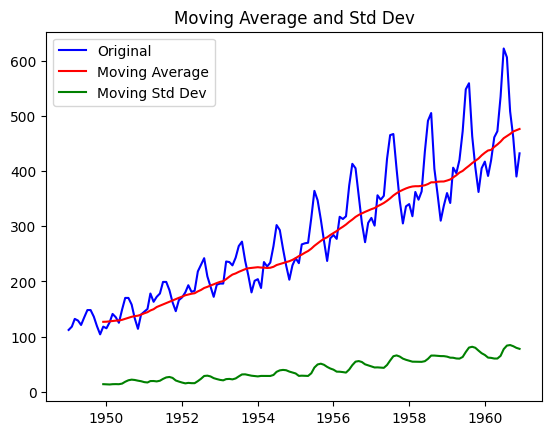

In [25]:
window = 12

mva = df.rolling(window=window).mean()
mstd = df.rolling(window=window).std()
plt.plot(df, color='blue', label='Original')
plt.plot(mva, color='red', label='Moving Average')
plt.plot(mstd, color='green', label='Moving Std Dev')
plt.title('Moving Average and Std Dev')
plt.legend()
plt.show()

In [26]:
def adf_test(series):
    result = sm.tsa.stattools.adfuller(series, autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', '#Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is non-stationary")

adf_test(df['value'])

ADF Test Statistic: 0.8153688792060482
p-value: 0.991880243437641
#Lags Used: 13
#Observations Used: 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
Series is non-stationary


In [27]:
from statsmodels.tsa.stattools import kpss

In [28]:
def kpss_test(timeseries):
    print('KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' % key] = value
    print(kpss_output)

kpss_test(df['value'])

KPSS Test:
Test Statistic           1.651312
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\shrey\AppData\Local\Temp\ipykernel_22236\625230123.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


<Axes: title={'center': 'Differenced Series'}, xlabel='date'>

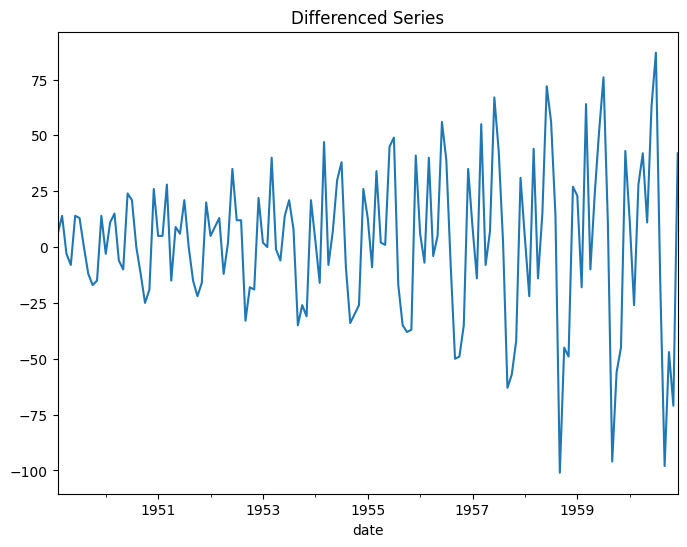

In [29]:
df['value_diff'] = df['value'] - df['value'].shift(1)
df['value_diff'].dropna().plot(figsize=(8,6), title='Differenced Series')

<Axes: title={'center': 'Differenced Series with Lag'}, xlabel='date'>

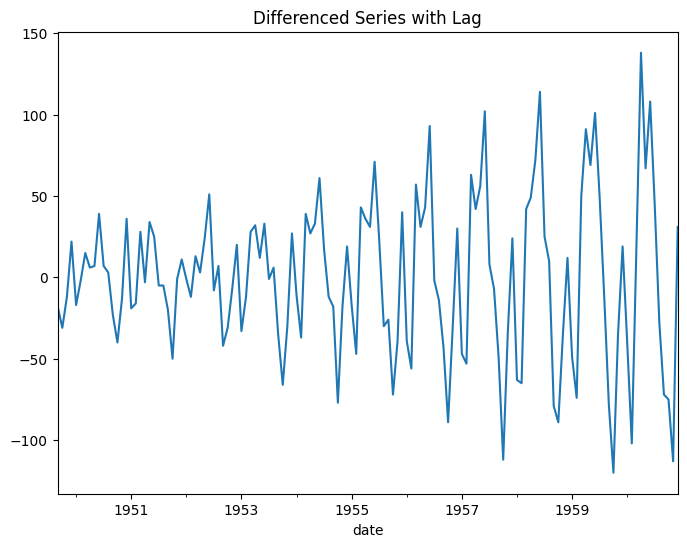

In [30]:
n = 7
df['value_diff_n'] =  df['value_diff'] - df['value_diff'].shift(n)
df['value_diff_n'].dropna().plot(figsize=(8,6), title='Differenced Series with Lag')

<Axes: title={'center': 'Log Differenced Series'}, xlabel='date'>

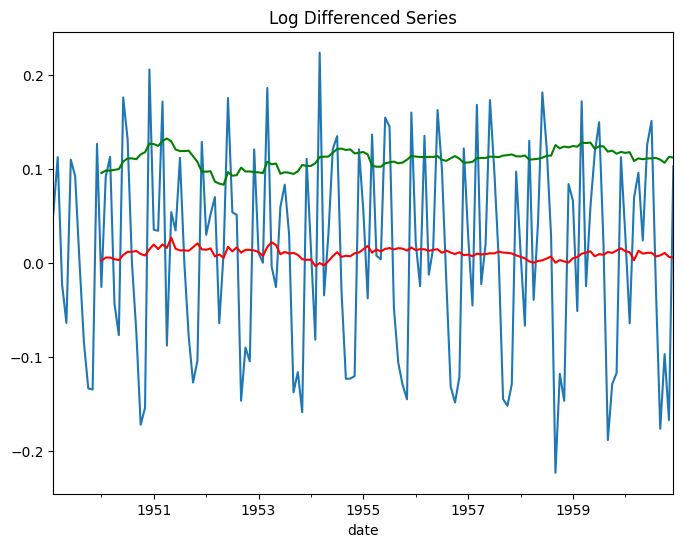

In [32]:
df['value_log'] = np.log(df['value'])
df['value_log_diff'] = df['value_log'] - df['value_log'].shift(1)

mva_log = df['value_log_diff'].rolling(window=window).mean()
mstd_log = df['value_log_diff'].rolling(window=window).std()

df['value_log_diff'].dropna().plot(figsize=(8,6), title='Log Differenced Series')
mva_log.dropna().plot(label='Moving Average', color='red')
mstd_log.dropna().plot(label='Moving Std Dev', color='green')

In [33]:
dn = df['value_log_diff']
dn.dropna(inplace=True)
adf_test(dn)

ADF Test Statistic: -2.717130598388133
p-value: 0.07112054815085875
#Lags Used: 14
#Observations Used: 128
Critical Values:
   1%: -3.4825006939887997
   5%: -2.884397984161377
   10%: -2.578960197753906
Series is non-stationary


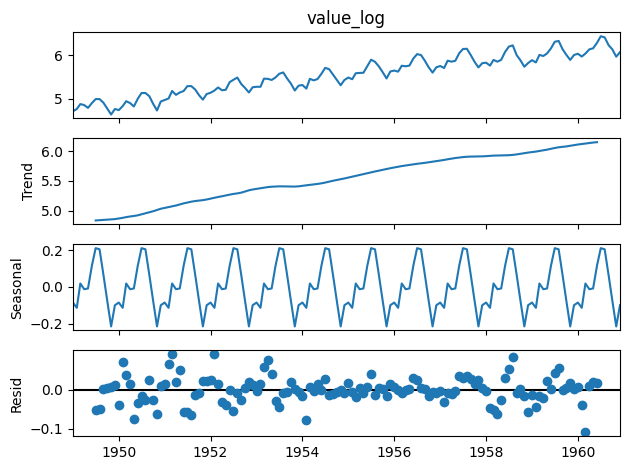

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

dc = seasonal_decompose(df['value_log'], model='additive')
dc.plot()
plt.show()

In [ ]:
fr